### Data Wrangling
- Data Munging / Data Pre-processing / Feature Engineering


In [1]:
import pandas as pd

In [2]:
life_exp = pd.read_excel('/Users/PaulWlodkowski/Downloads/gapminder_lifeexpectancy.xlsx')

In [3]:
life_exp.head()
### LEFT DF

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [5]:
continents = pd.read_csv('/Users/PaulWlodkowski/Downloads/continents.csv', sep=';')

In [7]:
continents.head()
### RIGHT DF

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [8]:
life_exp.shape, continents.shape

((260, 218), (194, 2))

### What is the average life expectancy by continent?

- We need to "merge" these dataframes together, so that the information is contained in a single dataframe.
    - `pd.merge()`
    
- equivalent of an SQL **join**
- equivalent of an Excel `VLOOKUP` (technically a "left merge / join")

In [10]:
merged = pd.merge(life_exp, continents, left_on='Life expectancy', right_on='country')

By default, we only were returned rows in the merged dataframe ONLY where the country in life_exp = country in continents (EXACT SPELLING). Only where they both matched.
    - "inner join"

In [27]:
merged_left = pd.merge(life_exp, continents, left_on='Life expectancy', right_on='country', how='left')

In [28]:
merged_left.shape, life_exp.shape, continents.shape

((260, 220), (260, 218), (194, 2))

In [29]:
mask = merged_left['continent'].isna() #is the value na? Either True or False

In [30]:
merged_left[mask]['Life expectancy'].values
### "Problem" countries from the left dataframe

array(['Abkhazia', 'Akrotiri and Dhekelia', 'American Samoa', 'Anguilla',
       'Aruba', 'Bermuda', 'British Virgin Islands', 'Burkina Faso',
       'Cayman Islands', 'Channel Islands', 'Christmas Island',
       'Cocos Island', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Is',
       "Cote d'Ivoire", 'Czechoslovakia', 'East Germany',
       'Eritrea and Ethiopia', 'Faeroe Islands', 'Falkland Is (Malvinas)',
       'French Guiana', 'French Polynesia', 'Gibraltar', 'Greenland',
       'Guadeloupe', 'Guam', 'Guernsey', 'Holy See', 'Hong Kong, China',
       'Isle of Man', 'Jersey', 'North Korea', 'South Korea',
       'United Korea (former)\n', 'Kosovo', 'Kyrgyz Republic', 'Lao',
       'Macao, China', 'Macedonia, FYR', 'Martinique', 'Mayotte',
       'Micronesia, Fed. Sts.', 'Montserrat', 'Myanmar',
       'Netherlands Antilles', 'New Caledonia', 'Ngorno-Karabakh', 'Niue',
       'Norfolk Island', 'Northern Cyprus', 'Northern Mariana Islands',
       'Pitcairn', 'Puerto Rico', 'Reunion', '

In [31]:
merged_right = pd.merge(life_exp, continents, left_on='Life expectancy', right_on='country', how='right')
merged_right.shape, life_exp.shape, continents.shape

((194, 220), (260, 218), (194, 2))

In [35]:
merged_right[merged_right['Life expectancy'].isna()]['country'].values
### "Problem" countries from the right dataframe

array(['Burkina', 'Congo', 'Congo, Democratic Republic of', 'Ivory Coast',
       'Burma (Myanmar)', 'East Timor', 'Korea, North', 'Korea, South',
       'Kyrgyzstan', 'Laos', 'Russian Federation', 'Macedonia',
       'Slovakia', 'Vatican City', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Micronesia'], dtype=object)

----

Let's stick with the inner join. Why? Because it doesn't return an NaNs. So if I don't care about the countries that got "lost" in the merge due to misspellings, etc., then this is fine.

In [37]:
merged_inner = pd.merge(life_exp, continents, left_on='Life expectancy', right_on='country', how='inner')

In [38]:
merged_inner

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,continent,country
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72,Asia,Afghanistan
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10,Europe,Albania
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50,Africa,Algeria
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80,Europe,Andorra
4,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00,Africa,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vietnam,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,...,74.3,74.5,74.7,74.9,75.0,75.2,75.4,75.60,Asia,Vietnam
172,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,66.2,66.6,66.6,66.7,67.1,67.1,66.0,64.92,Asia,Yemen
173,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10,Africa,Zambia
174,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69,Africa,Zimbabwe


### What is the avg life expectancy by continent:
- let's do first for a single year
- let's do all years

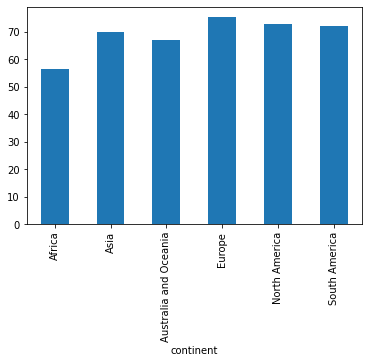

In [50]:
merged_inner.groupby(['continent'])[2000].mean().plot.bar()

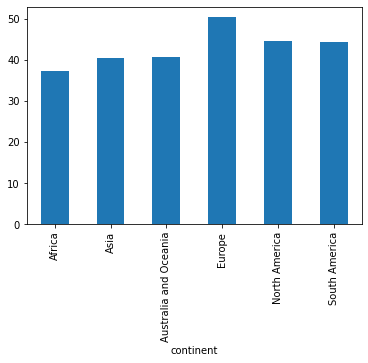

In [59]:
merged_inner.groupby('continent').mean().transpose().mean().plot.bar()

In [62]:
merged_inner.groupby('continent').mean().mean(axis=1)

continent
Africa                   37.343520
Asia                     40.389792
Australia and Oceania    40.673978
Europe                   50.337708
North America            44.459851
South America            44.355664
dtype: float64

### Removing missing values:
- `df.dropna()`
    - `df.dropna(axis=0)` drop rows that contain missing values (DEFAULT)
    - `df.dropna(axis=1)` drop columns that contain missing values

In [63]:
fert = pd.read_csv('/Users/PaulWlodkowski/Downloads/gapminder_total_fertility.csv')

In [75]:
bool_filter = fert['2015'] <= 1.5

In [78]:
result = fert[fert['2015'] <= 1.5]

In [86]:
result.sort_values(by='2015').head(5)[['Total fertility rate', '2015']]

,Total fertility rate,2015
131,"Macao, China",1.13
98,"Hong Kong, China",1.17
204,Singapore,1.30
180,Portugal,1.31
27,Bosnia and Herzegovina,1.32


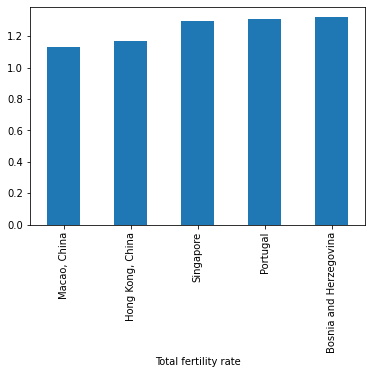

In [95]:
result.set_index('Total fertility rate')['2015'].sort_values().iloc[:5].plot.bar()